MINI PROJECT

MR.Sahaphon Yodphet 6410210655

In [178]:
import pandas as pd

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
df = pd.read_csv('/content/drive/MyDrive/Mini project Data sci/Emotions.csv')
print(df.head())

   Unnamed                                               text  label
0        0      i just feel really helpless and heavy hearted      4
1        1  ive enjoyed being able to slouch about relax a...      0
2        2  i gave up my internship with the dmrg and am f...      4
3        3                         i dont know i feel so lost      0
4        4  i am a kindergarten teacher and i am thoroughl...      4


In [181]:
# Shape Of Data
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (10111, 3)


In [182]:
# Null Values
df.isnull().sum()

Unnamed    0
text       0
label      0
dtype: int64

In [183]:
# Duplicates
df.duplicated().sum()

0

Renaming The Columns Names

In [184]:
# Rename Columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed',axis=1,inplace=True)

In [185]:

print(df.columns)

Index(['Text', 'Label'], dtype='object')


In [186]:

df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [188]:
df = pd.read_csv('/content/drive/MyDrive/Mini project Data sci/Emotions.csv')
df.head()

,Unnamed,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


สกัดคุณลักษณะ (ทำ feature extraction) ของข้อมูลข้อความ

Bag-of-Words (BoW): สร้าง vector ของคุณลักษณะจากการนับคำทั้งหมดในข้อความ

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


X_bow = vectorizer.fit_transform(df['text'])

print("Shape of BoW vectors:", X_bow.shape)

print("Vocabulary:", vectorizer.vocabulary_)


Shape of BoW vectors: (10111, 11880)
Vocabulary: {'just': 5697, 'feel': 3891, 'really': 8393, 'helpless': 4834, 'and': 389, 'heavy': 4806, 'hearted': 4794, 'ive': 5553, 'enjoyed': 3488, 'being': 970, 'able': 15, 'to': 10678, 'slouch': 9551, 'about': 22, 'relax': 8541, 'unwind': 11155, 'frankly': 4189, 'needed': 6920, 'it': 5539, 'after': 216, 'those': 10581, 'last': 5893, 'few': 3924, 'weeks': 11522, 'around': 568, 'the': 10519, 'end': 3446, 'of': 7179, 'uni': 11075, 'expo': 3725, 'have': 4753, 'lately': 5898, 'started': 9896, 'find': 3973, 'myself': 6839, 'feeling': 3895, 'bit': 1074, 'listless': 6101, 'which': 11576, 'is': 5519, 'never': 6962, 'good': 4475, 'thing': 10562, 'gave': 4346, 'up': 11157, 'my': 6834, 'internship': 5432, 'with': 11671, 'dmrg': 3033, 'am': 341, 'distraught': 3013, 'dont': 3070, 'know': 5806, 'so': 9633, 'lost': 6189, 'kindergarten': 5769, 'teacher': 10394, 'thoroughly': 10580, 'weary': 11500, 'job': 5624, 'having': 4756, 'taken': 10339, 'university': 11097, 

N-grams: สร้างคุณลักษณะโดยพิจารณาลำดับของคำหรือตัวอักษรที่เป็นไปได้

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2))

X_ngrams = vectorizer.fit_transform(df['text'])

print("Shape of N-grams vectors:", X_ngrams.shape)

print("Vocabulary:", vectorizer.vocabulary_)


Shape of N-grams vectors: (10111, 89144)
Vocabulary: {'just': 40625, 'feel': 24935, 'really': 60825, 'helpless': 33713, 'and': 3388, 'heavy': 33553, 'hearted': 33506, 'just feel': 40711, 'feel really': 25481, 'really helpless': 60952, 'helpless and': 33716, 'and heavy': 4113, 'heavy hearted': 33557, 'ive': 40019, 'enjoyed': 22580, 'being': 10056, 'able': 43, 'to': 78146, 'slouch': 66504, 'about': 63, 'relax': 61711, 'unwind': 81574, 'frankly': 28363, 'needed': 50254, 'it': 39384, 'after': 1241, 'those': 77244, 'last': 41893, 'few': 26706, 'weeks': 84649, 'around': 6579, 'the': 73313, 'end': 22365, 'of': 52160, 'uni': 81240, 'expo': 24009, 'have': 32502, 'lately': 41976, 'started': 69032, 'find': 26969, 'myself': 49785, 'feeling': 25752, 'bit': 10885, 'listless': 43654, 'which': 85715, 'is': 38722, 'never': 50453, 'good': 30515, 'thing': 76346, 'ive enjoyed': 40044, 'enjoyed being': 22583, 'being able': 10057, 'able to': 47, 'to slouch': 79002, 'slouch about': 66505, 'about relax': 255,

In [191]:
# บันทึก DataFrame ที่ชื่อว่า df ลงในไดรฟ์ของ Google Drive
df.to_csv('/content/drive/MyDrive/Mini project Data sci/Minipro Emotions.csv', index=False)
print("Data saved successfully.")

Data saved successfully.


Emotion Distribution

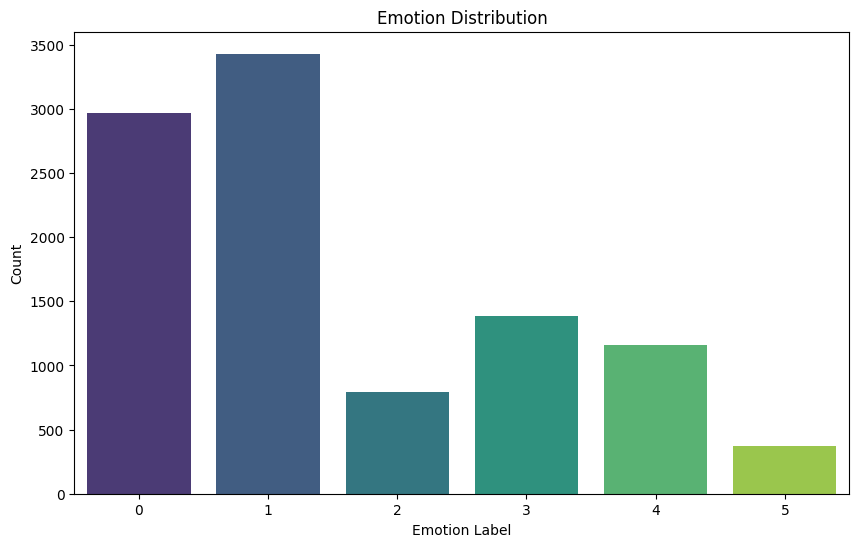

In [192]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Emotion Distribution')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.show()

Text Length Distribution

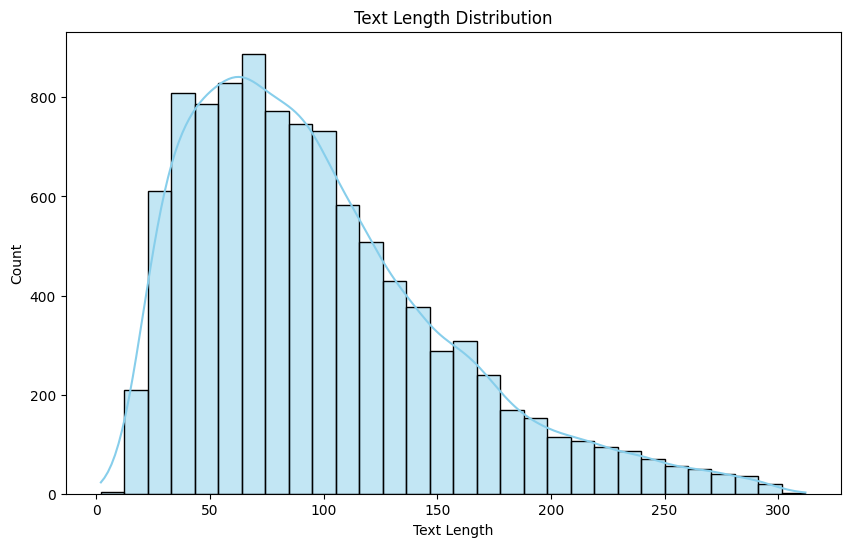

In [193]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='text_length', bins=30, kde=True, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

Emotion vs. Text Length

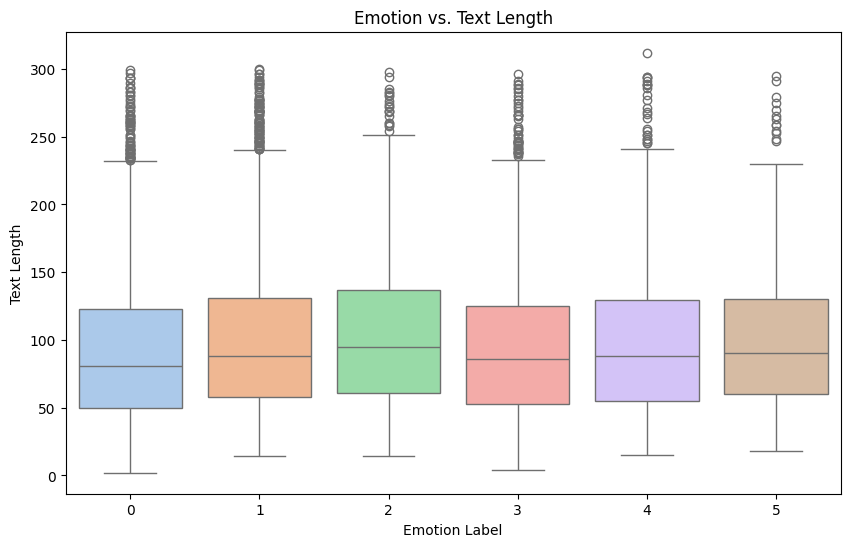

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df, palette='pastel')
plt.title('Emotion vs. Text Length')
plt.xlabel('Emotion Label')
plt.ylabel('Text Length')
plt.show()

Word Cloud for Each Emotion

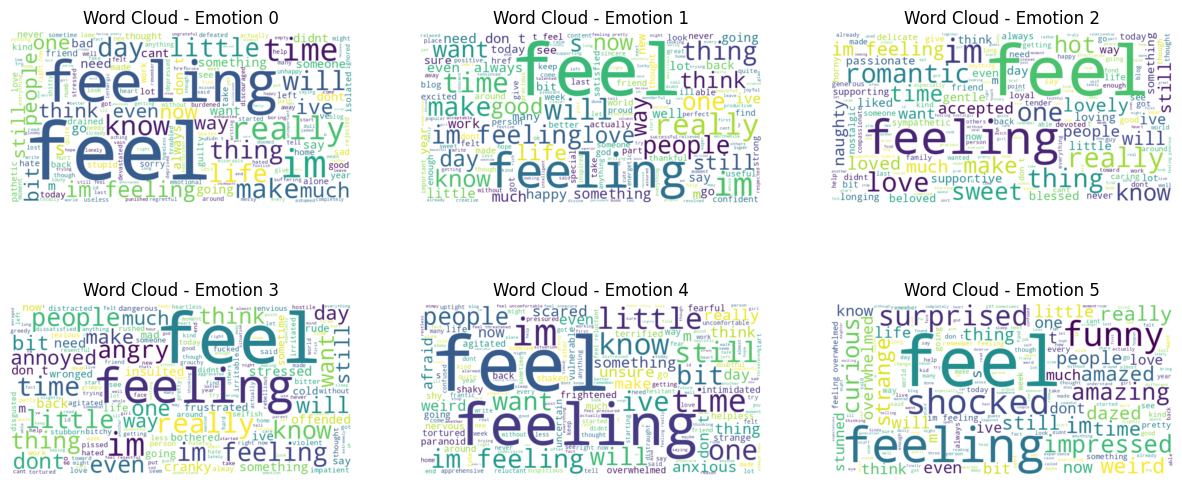

In [195]:
from wordcloud import WordCloud

emotions = df['label'].unique()
plt.figure(figsize=(15, 10))
for emotion in emotions:
    subset = df[df['label'] == emotion]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(3, 3, emotion+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Emotion {emotion}')
    plt.axis('off')
plt.show()

XGBoost Model Training

Train-Test Split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=0)

In [197]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [198]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42)
xgb_model.fit(X_train_vec, y_train)

y_pred = xgb_model.predict(X_test_vec)


In [199]:
y_pred = xgb_model.predict(X_test_vec)

In [200]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", conf_matrix)



Model Evaluation:
Accuracy: 0.8808699950568463

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       590
           1       0.86      0.91      0.88       655
           2       0.80      0.79      0.80       160
           3       0.89      0.88      0.89       291
           4       0.87      0.87      0.87       249
           5       0.81      0.91      0.86        78

    accuracy                           0.88      2023
   macro avg       0.86      0.87      0.87      2023
weighted avg       0.88      0.88      0.88      2023


Confusion Matrix:
 [[517  40   7  14  12   0]
 [ 14 596  24   8   5   8]
 [  1  30 127   0   1   1]
 [  8  19   0 255   9   0]
 [  7   9   1   8 216   8]
 [  1   2   0   0   4  71]]


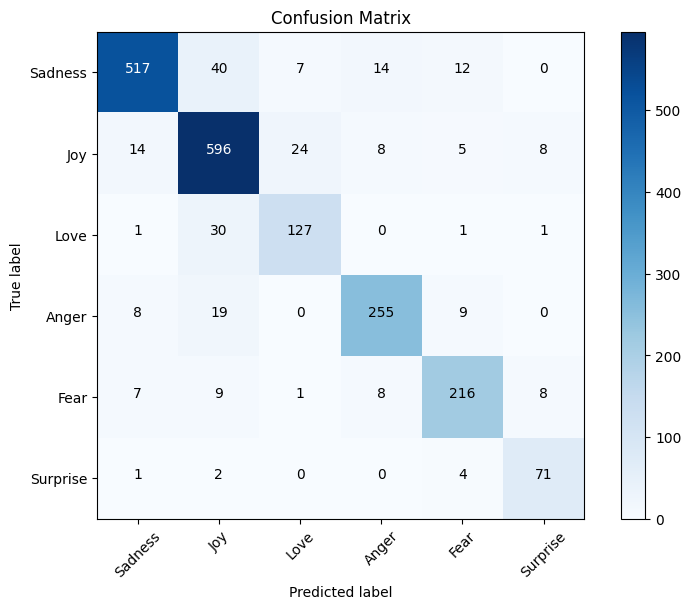

In [201]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()


---

Model MultinomialNB

In [202]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(max_features=4000)


In [203]:
new_X_train = vectorize.fit_transform(X_train)
new_X_test = vectorize.transform(X_test)

In [204]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()


In [205]:
model.fit(new_X_train,y_train)

MultinomialNB()

In [206]:
y_predict = model.predict(new_X_test)

In [207]:
confusion_matrix(y_test,y_predict)

array([[518,  72,   0,   0,   0,   0],
       [ 15, 639,   0,   1,   0,   0],
       [ 26, 124,  10,   0,   0,   0],
       [103, 124,   0,  63,   1,   0],
       [108, 101,   0,   7,  33,   0],
       [ 25,  49,   0,   0,   3,   1]])

In [208]:
accuracy_score(y_test,y_predict)

0.6248146317350469

In [209]:
vectorize = TfidfVectorizer(max_features=4000)

new_X_train = vectorize.fit_transform(X_train)
new_X_test = vectorize.transform(X_test)

model = MultinomialNB()

model.fit(new_X_train, y_train)

y_pred = model.predict(new_X_test)

print("\nModel Evaluation:")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Evaluation:
Accuracy: 0.6248146317350469

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75       590
           1       0.58      0.98      0.72       655
           2       1.00      0.06      0.12       160
           3       0.89      0.22      0.35       291
           4       0.89      0.13      0.23       249
           5       1.00      0.01      0.03        78

    accuracy                           0.62      2023
   macro avg       0.83      0.38      0.37      2023
weighted avg       0.73      0.62      0.54      2023


Confusion Matrix:
 [[518  72   0   0   0   0]
 [ 15 639   0   1   0   0]
 [ 26 124  10   0   0   0]
 [103 124   0  63   1   0]
 [108 101   0   7  33   0]
 [ 25  49   0   0   3   1]]


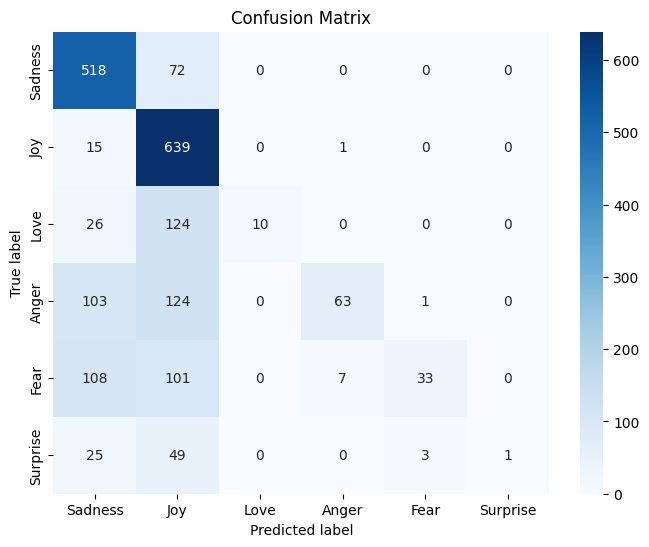

Accuracy Score: 0.6248146317350469
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.75       590
           1       0.58      0.98      0.72       655
           2       1.00      0.06      0.12       160
           3       0.89      0.22      0.35       291
           4       0.89      0.13      0.23       249
           5       1.00      0.01      0.03        78

    accuracy                           0.62      2023
   macro avg       0.83      0.38      0.37      2023
weighted avg       0.73      0.62      0.54      2023



In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(max_features=4000)

new_X_train = vectorizer.fit_transform(X_train)
new_X_test = vectorizer.transform(X_test)

model = MultinomialNB()

model.fit(new_X_train, y_train)

y_pred = model.predict(new_X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], yticklabels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


----------

การนำโมเดลไปใช้งาน (Deploy Model)

In [211]:
import pickle

# บันทึกโมเดล
with open('good model.pkl', 'wb') as file:
    pickle.dump(model, file)

# โหลดโมเดล
with open('good model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [212]:
# ข้อความตัวอย่างที่ต้องการทำนาย
sample_text = "I'm excited to see the prediction!"

# ทำการแปลงข้อความตัวอย่าง
sample_vectorized = vectorize.transform([sample_text])

# ทำนายผลของข้อมูลทดสอบ
predicted_label = loaded_model.predict(sample_vectorized)

# แปลงป้ายกำกับเป็นข้อความ
label_mapping = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
predicted_label_text = label_mapping[predicted_label[0]]

print("Predicted Label:", predicted_label_text)


Predicted Label: Joy
